# Data Visualization Workbook - version 2

### Importantion and Data

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#results
results_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/results.csv'
results_df = pd.read_csv(results_url, sep = ',', engine = 'python')
results_df.head()

#status
status_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/status.csv'
status_df = pd.read_csv(status_url, sep = ',', engine = 'python')

#circuits
circuits_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/circuits.csv'
circuits_df = pd.read_csv(circuits_url, sep = ',', encoding = 'latin-1')

#races
races_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/races.csv'
races_df = pd.read_csv(races_url, sep = ',', engine = 'c')

#Drivers
drivers_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/drivers.csv'
drivers_df = pd.read_csv(drivers_url, sep = ',', encoding = 'latin-1')

#lap Times
lap_times_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/lap_times.csv'
lap_times_df = pd.read_csv(lap_times_url, sep = ',', engine = 'python')

#MasterData5
MasterData5_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/processed/MasterData5.csv'
MasterData5_df = pd.read_csv(MasterData5_url, sep = ',', engine = 'python')

#races-v4
race_weather_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/interim/races-v4.csv'
race_weather_df = pd.read_csv(race_weather_url, sep = ',', engine = 'python')

#MasterData5-oneHot
Master5_oneHot_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/processed/OneHot_MasterData5.csv'
Master5_oneHot_df = pd.read_csv(Master5_oneHot_url, sep = ',', engine = 'python')

In [33]:
MasterData5_df

,raceId,driverId,constructorId,grid,familyStatus,Completion Status,year,circuitId,country,alt,...,TAVG,TMAX,TMIN,oneHot_circuits_1,oneHot_circuits_2,oneHot_circuits_3,oneHot_circuits_4,oneHot_circuits_5,oneHot_circuits_6,trackType2
0,1,2,2,9,4,1,2009,1,Australia,10,...,72.0,78.0,66.0,0,1,0,0,0,0,1
1,1,3,3,5,4,1,2009,1,Australia,10,...,72.0,78.0,66.0,0,1,0,0,0,0,1
2,1,4,4,10,4,1,2009,1,Australia,10,...,72.0,78.0,66.0,0,1,0,0,0,0,1
3,1,6,3,11,1,0,2009,1,Australia,10,...,72.0,78.0,66.0,0,1,0,0,0,0,1
4,1,7,5,17,4,1,2009,1,Australia,10,...,72.0,78.0,66.0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,1060,847,3,8,4,1,2021,70,Austria,678,...,67.0,64.0,61.0,0,0,0,1,0,0,0
9254,1060,849,3,18,4,1,2021,70,Austria,678,...,67.0,64.0,61.0,0,0,0,1,0,0,0
9255,1060,852,213,7,4,1,2021,70,Austria,678,...,67.0,64.0,61.0,0,0,0,1,0,0,0
9256,1060,853,210,20,4,1,2021,70,Austria,678,...,67.0,64.0,61.0,0,0,0,1,0,0,0


In [37]:
MasterData5_df_columns = MasterData5_df.columns.values.tolist()
MasterData5_df_columns

['raceId',
 'driverId',
 'constructorId',
 'grid',
 'familyStatus',
 'Completion Status',
 'year',
 'circuitId',
 'country',
 'alt',
 'isHistoric',
 'nationality',
 'total_lap_time',
 'average_lap_time',
 'minimum_lap_time',
 'PRCP',
 'TAVG',
 'TMAX',
 'TMIN',
 'oneHot_circuits_1',
 'oneHot_circuits_2',
 'oneHot_circuits_3',
 'oneHot_circuits_4',
 'oneHot_circuits_5',
 'oneHot_circuits_6',
 'trackType2']

In [21]:
# = Master5_oneHot_df[["raceId", "driverId", "constructorId", "grid", "familyStatus", "Completion Status", "year", 
                                #"circuitId", "country", "alt", "isHistoric", "nationality", "total_lap_time", "average_lap_time", 
                                 #"minimum_lap_time", "PRCP", "TAVG", "TMAX", "TMIN"]]
#Viz_data = Master5_oneHot_df.iloc[:,1:18]
#Viz_data = Viz_data.drop('position', axis='columns')
Viz_data = MasterData5_df
Viz_data = Viz_data.drop(['familyStatus','oneHot_circuits_1','oneHot_circuits_2','oneHot_circuits_3', 'oneHot_circuits_4', 'oneHot_circuits_5', 'oneHot_circuits_6'], axis='columns')
Viz_data

,raceId,driverId,constructorId,grid,Completion Status,year,circuitId,country,alt,isHistoric,nationality,total_lap_time,average_lap_time,minimum_lap_time,PRCP,TAVG,TMAX,TMIN,trackType2
0,1,2,2,9,1,2009,1,Australia,10,0,German,5662869,97635.672414,88283,0.00,72.0,78.0,66.0,1
1,1,3,3,5,1,2009,1,Australia,10,0,German,5661506,97612.172414,87706,0.00,72.0,78.0,66.0,1
2,1,4,4,10,1,2009,1,Australia,10,0,Spanish,5660663,97597.637931,88712,0.00,72.0,78.0,66.0,1
3,1,6,3,11,0,2009,1,Australia,10,0,Japanese,1560978,91822.235294,89923,0.00,72.0,78.0,66.0,1
4,1,7,5,17,1,2009,1,Australia,10,0,French,5662082,97622.103448,89823,0.00,72.0,78.0,66.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,1060,847,3,8,1,2021,70,Austria,678,0,British,5051219,72160.271429,68900,0.03,67.0,64.0,61.0,0
9254,1060,849,3,18,1,2021,70,Austria,678,0,Canadian,5077844,72540.628571,68874,0.03,67.0,64.0,61.0,0
9255,1060,852,213,7,1,2021,70,Austria,678,0,Japanese,5056962,72242.314286,68455,0.03,67.0,64.0,61.0,0
9256,1060,853,210,20,1,2021,70,Austria,678,0,Russian,5091577,73790.971014,69757,0.03,67.0,64.0,61.0,0


### Visualization 1: Heatmap

#### Visualization 1.1: Heatmap-Thomas with all features

In [22]:
corr = Viz_data.corr()

<AxesSubplot:>

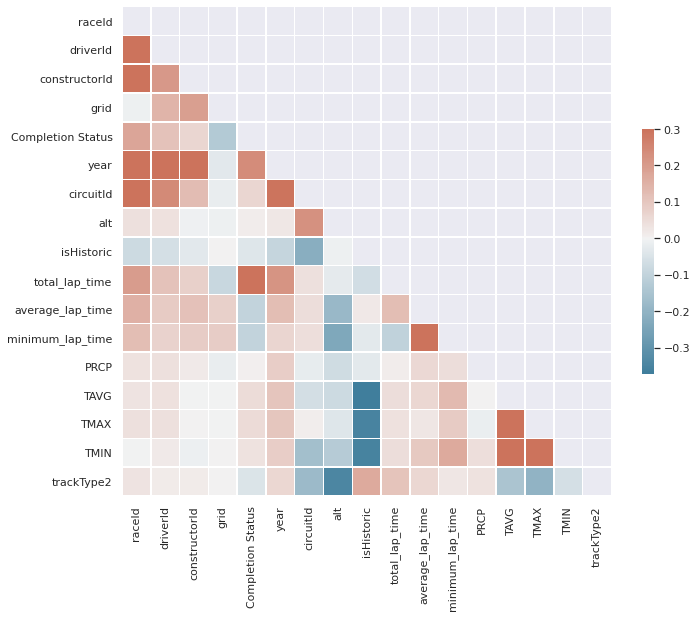

In [23]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,25))

#everything
total = MasterData5_df.groupby('constructorId')['familyStatus'].sum().reset_index()

#Binning
Success = MasterData5_df[MasterData5_df.familyStatus=='4']
VehicleFailure = MasterData5_df[MasterData5_df.familyStatus=='6']
TyreFailure = MasterData5_df[MasterData5_df.familyStatus=='5']
Collision = MasterData5_df[MasterData5_df.familyStatus=='2']
Accident = MasterData5_df[MasterData5_df.familyStatus=='1']

print(Success)
#Car Success (4)
SuccessBar = sns.barplot(x='constructorId', y='familyStatus', data=Success, estimator = sum, ci = None, color='darkgreen')
#Vehicle Failure (6)
VehicleFailureBar = sns.barplot(x='constructorId', y='familyStatus', data=VehicleFailure, estimator = sum, ci = None, color='lighblue')
#Tyre Failure (5)
TyreFailureBar = sns.barplot(x='constructorId', y='familyStatus', data=TyreFailure, estimator = sum, ci = None, color='lightgreen')
#Collision (2)
CollisionBar = sns.barplot(x='constructorId', y='familyStatus', data=Collision, estimator = sum, ci = None, color='darkred')
#Accident (1)
AccidentBar = sns.barplot(x='constructorId', y='familyStatus', data=Accident, estimator = sum, ci = None, color='lightred')


Empty DataFrame
Columns: [raceId, driverId, constructorId, grid, familyStatus, Completion Status, year, circuitId, country, alt, isHistoric, nationality, total_lap_time, average_lap_time, minimum_lap_time, PRCP, TAVG, TMAX, TMIN, oneHot_circuits_1, oneHot_circuits_2, oneHot_circuits_3, oneHot_circuits_4, oneHot_circuits_5, oneHot_circuits_6, trackType2]
Index: []

[0 rows x 26 columns]


ValueError: min() arg is an empty sequence

<Figure size 1800x1800 with 0 Axes>

#### Visualization 1.2: Heatmap-Bill but with different colors and added numbers. I need to delete some features.

In [ ]:
# I want to do a few heatmaps. Thomas is 1.1. I want to do one with 
# fewer features and numbers such as in 
# https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7.

Text(0.5, 1.0, 'Primary Feature Analysis')

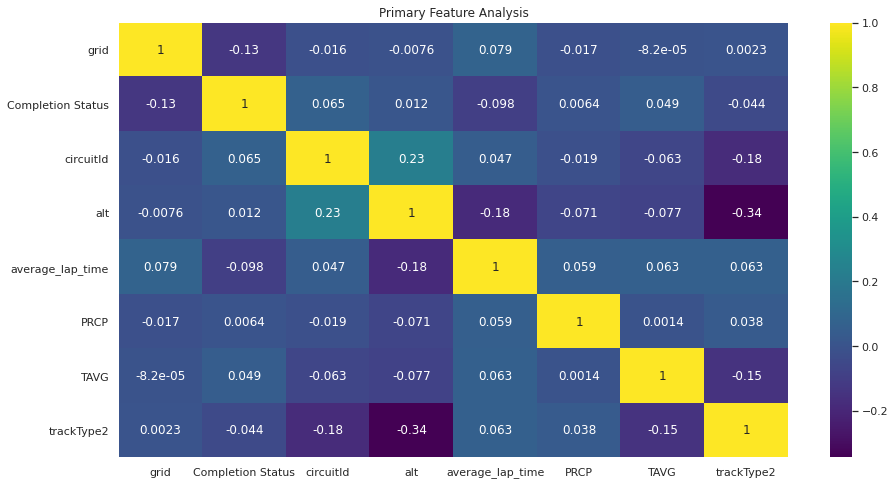

In [137]:
Viz_data_Heatmap = Viz_data.drop(['raceId','year','isHistoric','minimum_lap_time','TMAX','TMIN','driverId','constructorId','total_lap_time'],axis='columns')
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(Viz_data_Heatmap.corr(), annot = True, cmap = 'viridis')
plt.title("Primary Feature Analysis")
# Too much information. I need to pick at most 6 values here. 
# Think about what would be correlated. 

### Visualization 2: Scatter Plot

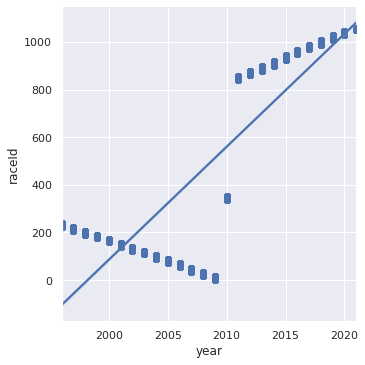

In [44]:
sns.lmplot(x='year', y='raceId', data=Viz_data)
#data=races_df

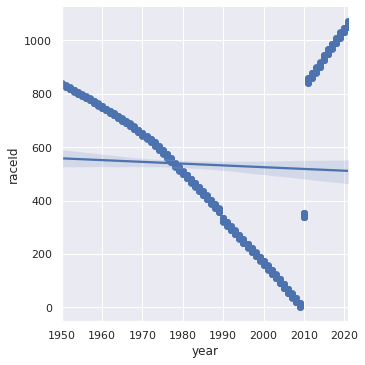

In [138]:
sns.lmplot(x='year', y='raceId', data=races_df)
#data=Viz_data

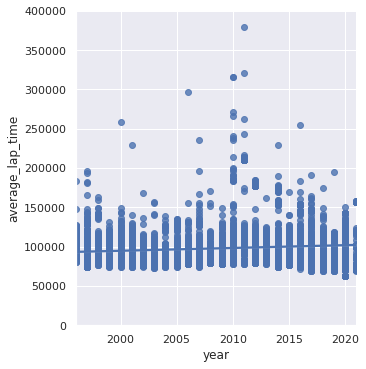

In [95]:
Lap_time_scatter_1 = sns.lmplot(x='year', y='average_lap_time', 
                                data=Viz_data)
Lap_time_scatter_1.set(ylim=(0,400000))
# We can remove those outliers

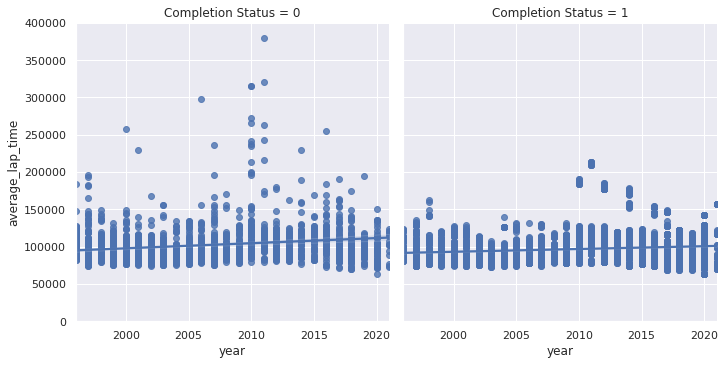

In [96]:
Lap_time_scatter_2 = sns.lmplot(x='year', y='average_lap_time', 
           col='Completion Status', data=Viz_data)
Lap_time_scatter_2.set(ylim=(0,400000))
# We can remove those outliers

### Visualization 3: Displot

In [ ]:
# Do a distribution plot with bins for race track difficulting and frequency of crashes.

/home/billy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

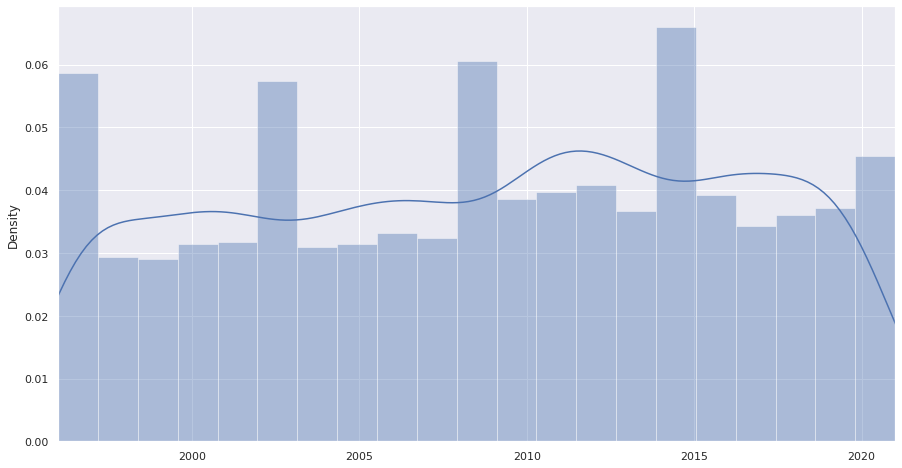

In [140]:
plt.xlim(1996,2021)
sns.distplot(x=Viz_data['year'])

/home/billy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distrubtion of Average Lap Times')

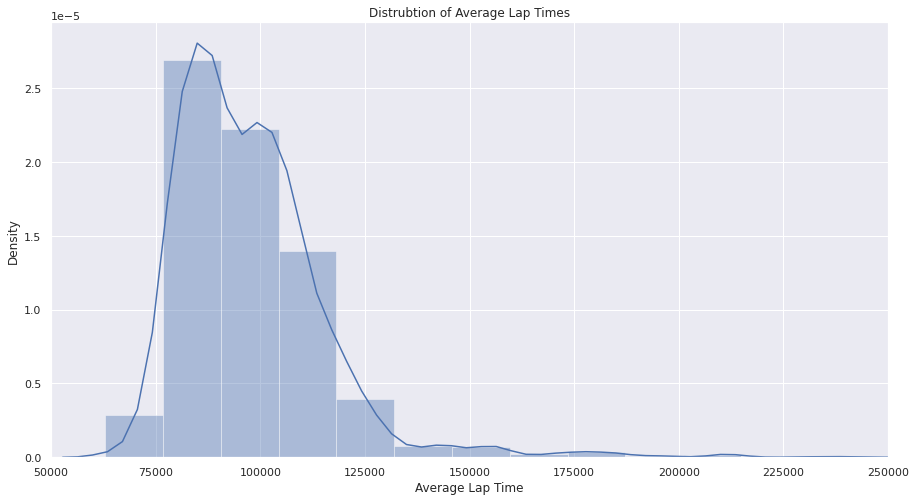

In [148]:
plt.xlim(50000,250000)
sns.distplot(x=Viz_data['average_lap_time'], 
             axlabel="Average Lap Time")
plt.title("Distrubtion of Average Lap Times")

### Visualization 4:Joint Plot

In [ ]:
#unable to complete a Joint Plot

### Visualization 5:Count Plot

/home/billy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Number of Race Completions versus Crashes')

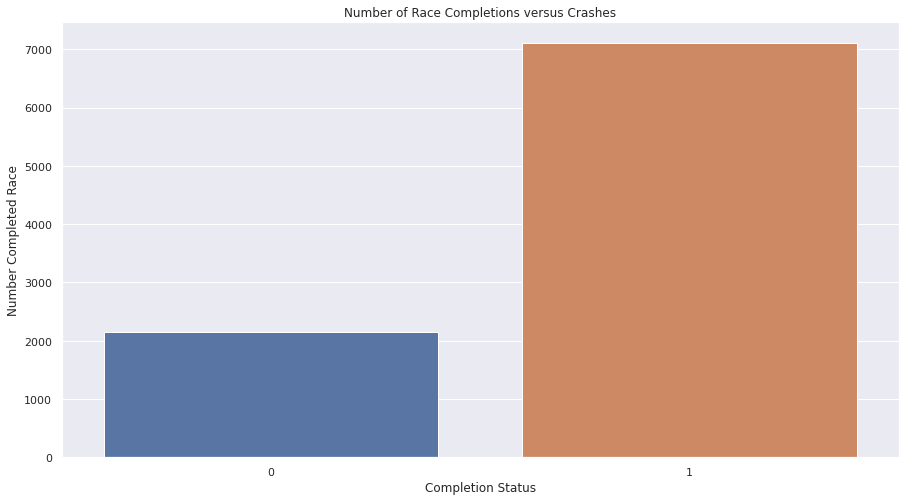

In [147]:
sns.countplot(Viz_data['Completion Status'])
plt.xlabel("Completion Status")
plt.ylabel("Number Completed Race")
plt.title("Number of Race Completions versus Crashes")

/home/billy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Completion Status', ylabel='count'>

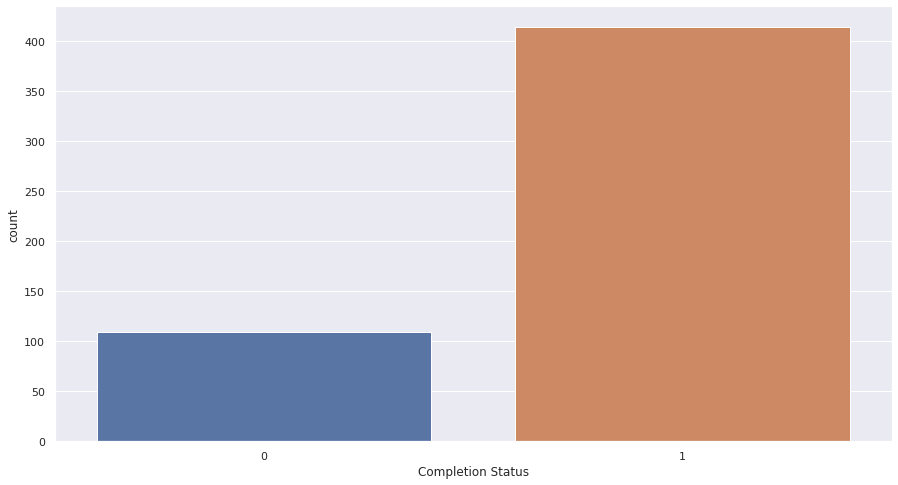

In [99]:
#Histogram for big tracks
#Silverstone (circuitId 9), 
#barcelona (circuitId 4),
#hungero ring (circuitId 11), 
#Monzo(circuitId 14), 
#Monaco (circuitId 6))
#sns.barplot(x='circuitId', y='Completion Status',data= Viz_data_Silver)
Viz_data_Silver = Viz_data.loc[Viz_data['circuitId']==9]
sns.countplot(Viz_data_Silver['Completion Status'])

### Visualization 6:Line Plot

Text(0.5, 1.0, '% Completed Race by Year')

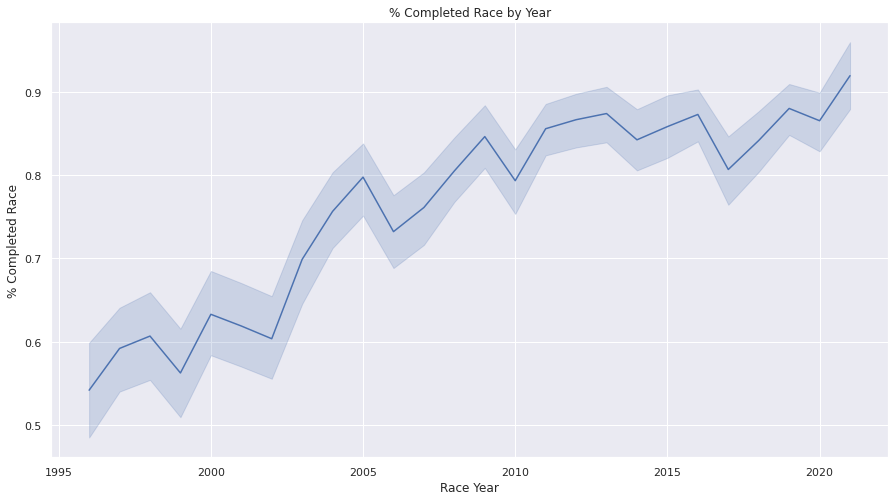

In [146]:
#https://livecodestream.dev/post/how-to-build-beautiful-plots-with-python-and-seaborn/
sns.lineplot(data=Viz_data, x='year', y='Completion Status')
plt.xlabel("Race Year")
plt.ylabel("% Completed Race")
plt.title("% Completed Race by Year")

Text(0.5, 1.0, 'Average Lab Time by Year')

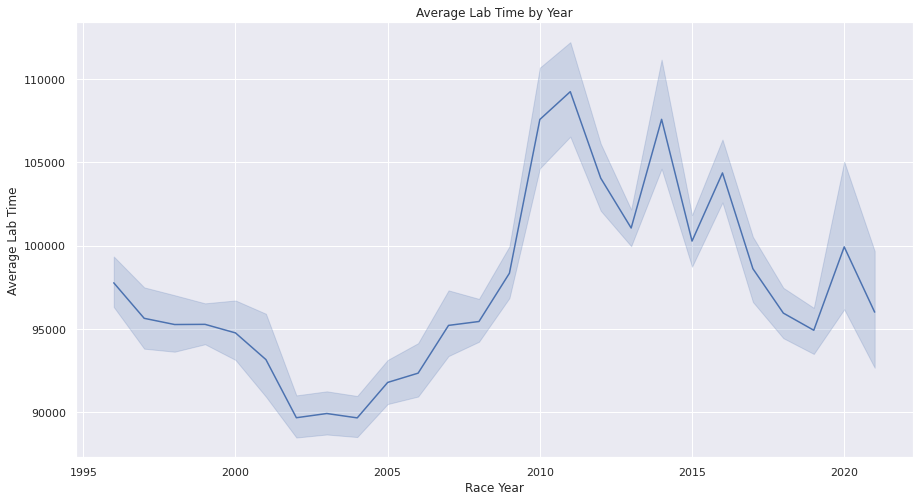

In [145]:
sns.lineplot(data=Viz_data, x='year', y='average_lap_time')
plt.xlabel("Race Year")
plt.ylabel("Average Lab Time")
plt.title("Average Lab Time by Year")

### Visualization 7:Histogram

In [ ]:
#### Visualization 7.1: Histogram-Do year as X axis. 
#then Y is number of crashes. 
#Can do this by track (for big ones like Silverstone (circuit ID 9), 
#barcelona (4),
#hungero ring (11), Monzo(14), Monaco (6))

Text(0.5, 1.0, 'Year Races versus % Completed Race')

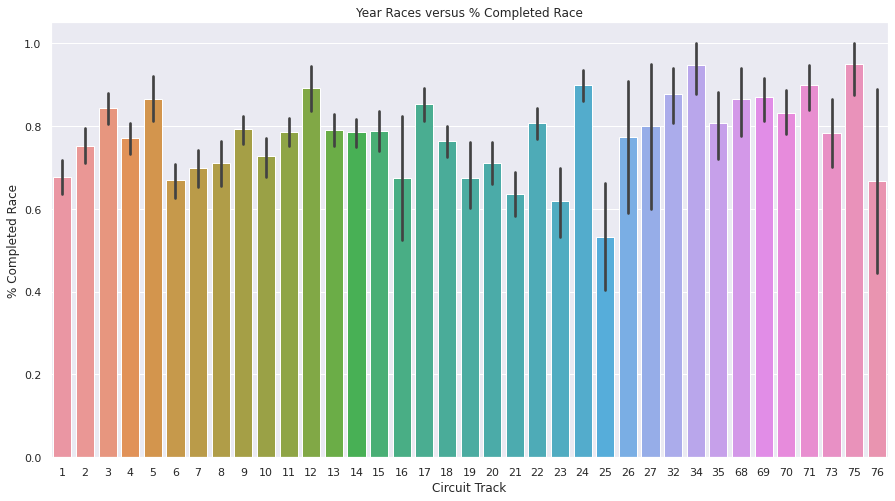

In [144]:
#Need to pull Curcuit name to below. 
sns.barplot(x='circuitId', y='Completion Status', data= Viz_data)
plt.xlabel("Circuit Track")
plt.ylabel("% Completed Race")
plt.title("Year Races versus % Completed Race")

<AxesSubplot:xlabel='grid', ylabel='Completion Status'>

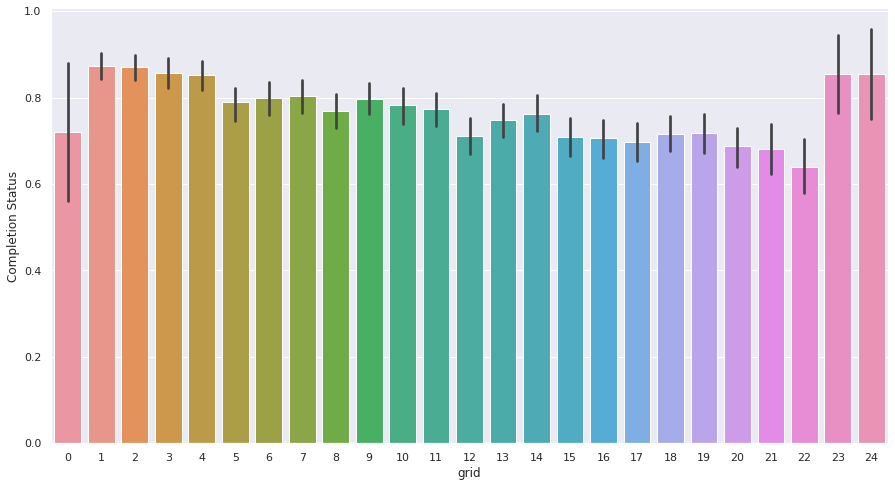

In [73]:
#need to remove 0 grid. 
sns.barplot(x='grid', y='Completion Status', data= Viz_data)

Text(0.5, 1.0, 'Starting Position versus % Completed Race')

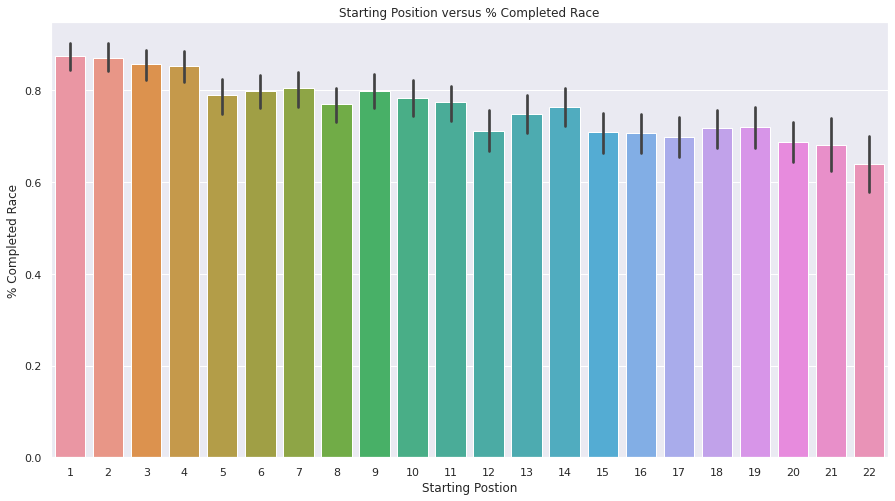

In [141]:
#removed 0, 23, 24 
Viz_data_fixed = Viz_data.loc[Viz_data['grid'].
                              isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])]
sns.barplot(x='grid', y='Completion Status', data= Viz_data_fixed)
plt.xlabel("Starting Postion")
plt.ylabel("% Completed Race")
plt.title("Starting Position versus % Completed Race")

Text(0.5, 1.0, 'Year Races versus % Completed Race')

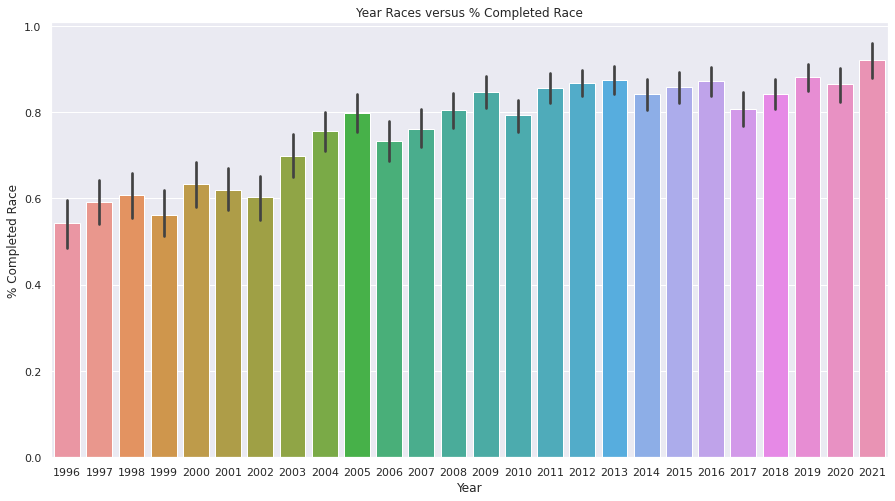

In [158]:
sns.barplot(x='year', y='Completion Status', data= Viz_data)
plt.xlabel("Year")
plt.ylabel("% Completed Race")
plt.title("Year Races versus % Completed Race")

In [143]:
#Histogram for big tracks
#Silverstone (circuitId 9), 
#barcelona (circuitId 4),
#hungero ring (circuitId 11), 
#Monzo(circuitId 14), 
#Monaco (circuitId 6))
#Viz_data_Silver = Viz_data.loc[Viz_data['circuitId']==9]
#sns.barplot(x='circuitId', y='Completion Status', data= Viz_data_Silver)

### Visualization 8:Pair Plots

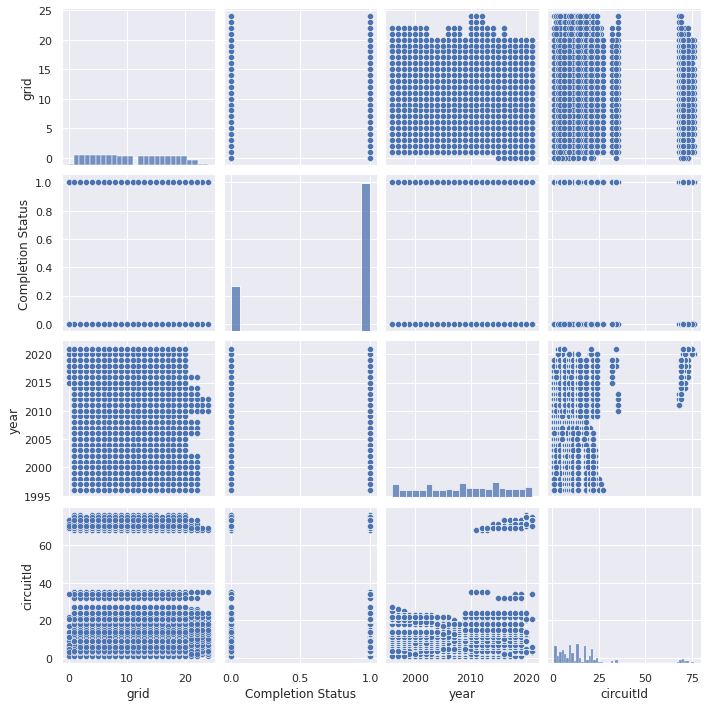

In [104]:
#https://builtin.com/data-science/data-visualization-tutorial
#Unable to determine anything with Pairs
Viz_data_Pairs = Viz_data[['grid', 'Completion Status', 'year', 'circuitId']]
sns.pairplot(Viz_data_Pairs)
plt.show()

### Visualization 9:Categorical Plots

/home/billy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


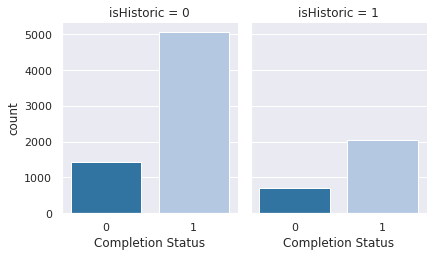

In [108]:
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
Catorical_Plot = sns.catplot('Completion Status', col="isHistoric", 
                col_wrap=4,
                data=Viz_data,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')
plt.show()

/home/billy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


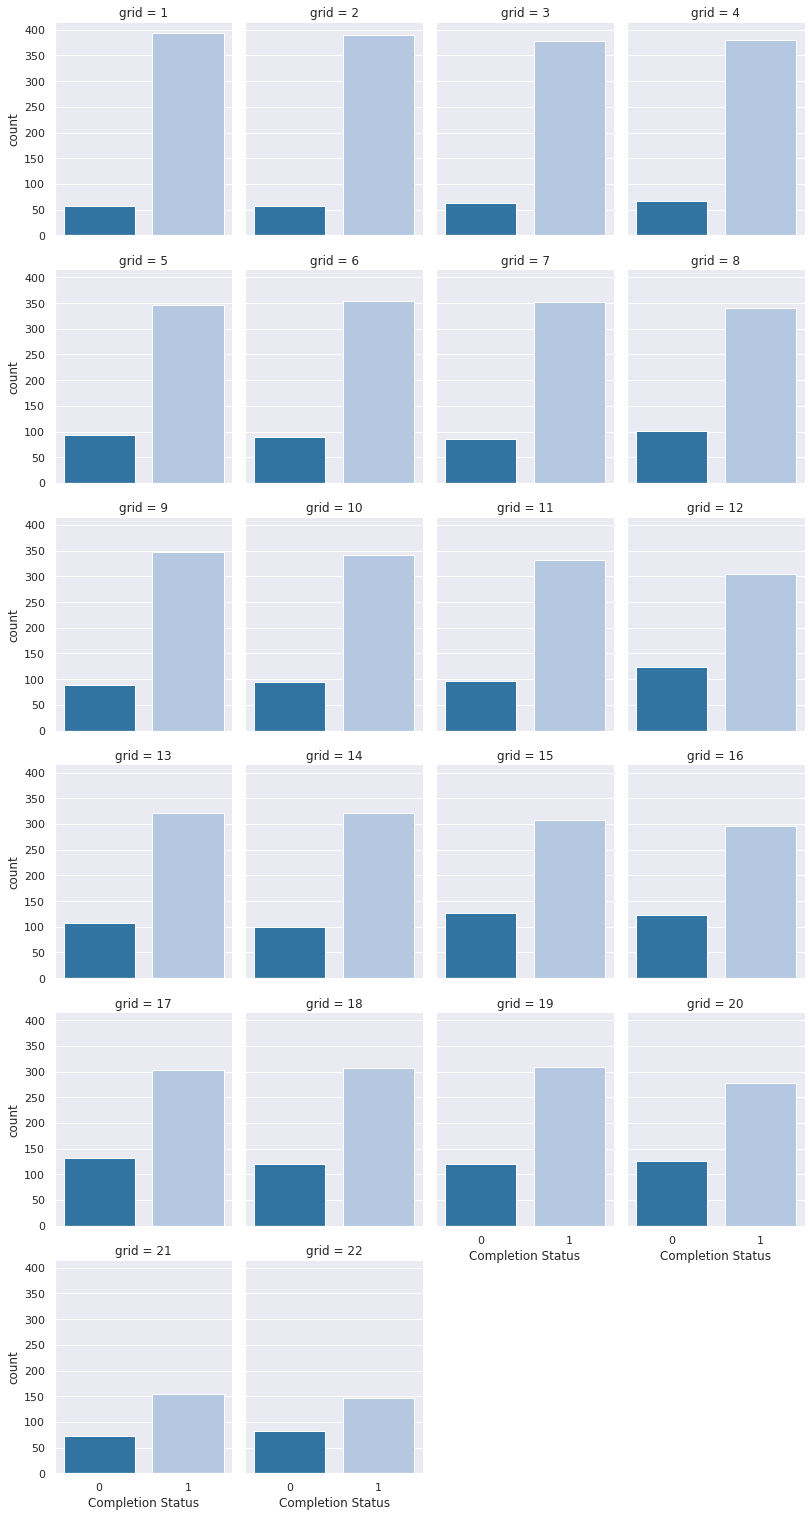

In [110]:
Viz_data_fixed = Viz_data.loc[Viz_data['grid'].
                              isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])]
Catorical_Plot = sns.catplot('Completion Status', col="grid", 
                col_wrap=4,
                data=Viz_data_fixed,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')
plt.show()

/home/billy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


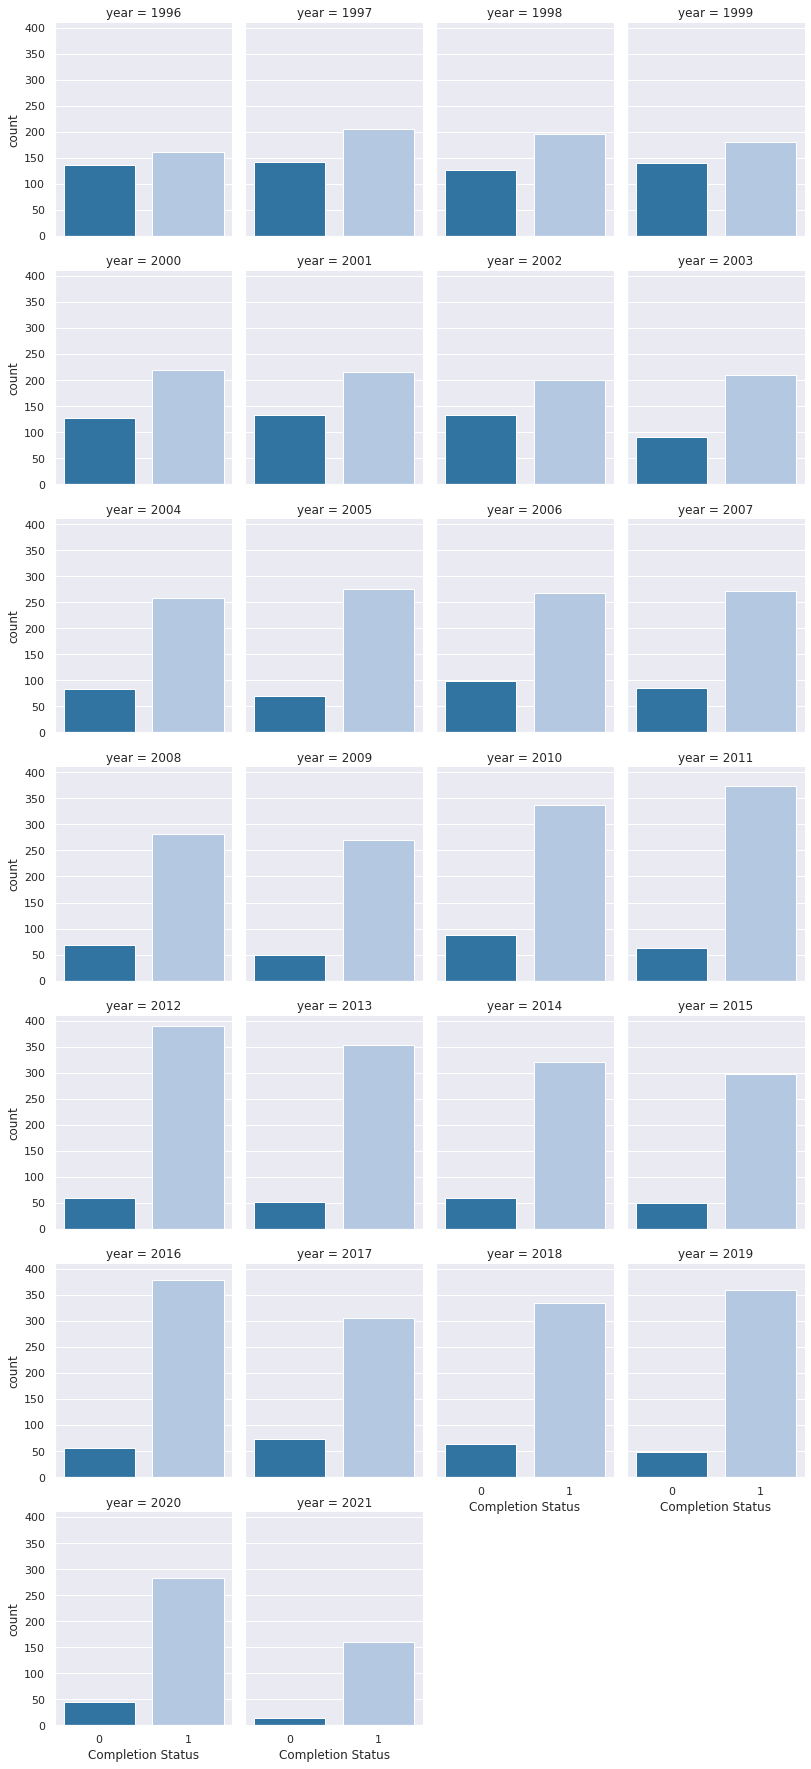

In [111]:
Catorical_Plot = sns.catplot('Completion Status', col="year", 
                col_wrap=4,
                data=Viz_data,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')
plt.show()

### Visualization 10:Gapminder Visualization

In [119]:
import plotly.express as px
#Gap_Viz_data = px.data.Viz_data()

In [163]:
#x=speed. y=crashes percentages
#https://www.youtube.com/watch?v=oYVLxaxn3Dg&t=12s
# Vizualizer does not work. Unsure how to fix it. 
px.scatter(data_frame=Viz_data, x='average_lap_time',
           y='Completion Status', 
           size='circuitId', 
           #or could do size='curcuitId', 
           color='country', 
           title='Formula1 Crashes Over Time', 
           labels ={'average_lap_time':'Average Lap Time', 
                    'Completion Status':'Finished'},
          #log_x=True, 
          range_y=[-10,10], 
           range_x=[5000,500000],
           hover_name='country',         
           #or could do hover_name='curcuit', 
          animation_frame='year', 
           height=600, 
           size_max=100)

In [161]:
#x=speed. y=crashes percentages
#https://www.youtube.com/watch?v=oYVLxaxn3Dg&t=12s
# Vizualizer does not work. Unsure how to fix it. 
px.scatter(data_frame=Viz_data, x='TAVG',
           y='Completion Status', 
           size='circuitId', 
           #or could do size='curcuitId', 
           color='country', 
           title='Formula1 Crashes Over Time', 
           labels ={'TAVG':'Average Temperature', 
                    'Completion Status':'Finished'},
          #log_x=True, 
          range_y=[-10,10], 
           range_x=[20,100],
           hover_name='country',         
           #or could do hover_name='curcuit', 
          animation_frame='year', 
           height=600, 
           size_max=100)

In [ ]:
#x=speed. y=crashes percentages
#https://www.youtube.com/watch?v=oYVLxaxn3Dg&t=12s
"""px.scatter(data_frame=gapminder_df, x='gdpPercap',y='lifeExp', 
           size='pop', 
           color='continent', 
           title='Life Span', 
           labels ={'gdpPercap':'Wealth', 'lifeExp':'Life Span'},
           #title='Formula1 Crashes Over Time', labels ={'':'Speed', '':'Crashes'}, 
          log_x=True, 
          range_y=[25,95], 
           #range_y=[0,1], 
           hover_name='country',         
           #hover_name='curcuit',
          animation_frame='year', 
           height=600, 
           size_max=100)"""